/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


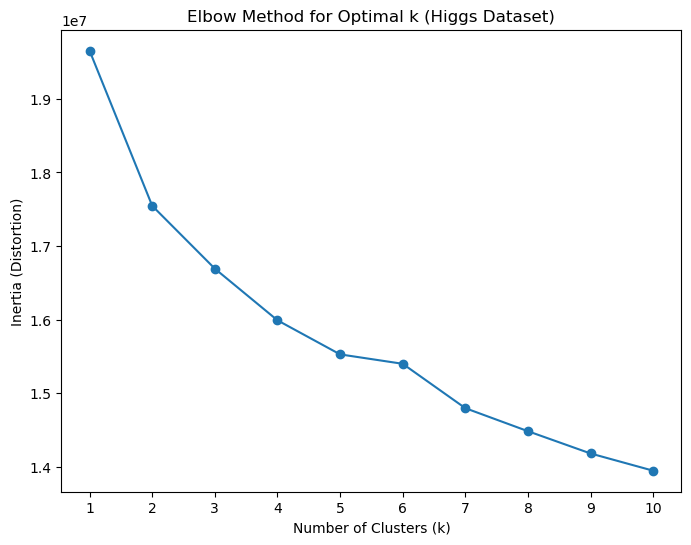

Optimal number of clusters (k): 2


In [3]:
import cudf
import numpy as np
import matplotlib.pyplot as plt
from cuml.cluster import KMeans  # GPU-accelerated KMeans

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the Higgs datasets
higgs_train = cudf.read_csv("higgs_train.csv")
higgs_test  = cudf.read_csv("higgs_test.csv")

# Combine train and test sets
higgs_data = cudf.concat([higgs_train, higgs_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = higgs_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Apply Elbow Method
# ---------------------------
distortions = []  # Store inertia values
K_range = range(1, 11)  # Test k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)  # Inertia = sum of squared distances to cluster centers

# ---------------------------
# 3. Plot Elbow Curve
# ---------------------------
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k (Higgs Dataset)')
plt.xticks(K_range)
plt.show()

# ---------------------------
# 4. Calculate Optimal k (Elbow Point)
# ---------------------------
# Calculate the "elbow" by finding the largest drop in inertia
delta_inertia = np.diff(distortions)
optimal_k = np.argmin(delta_inertia) + 2  # Add 2 because np.diff reduces size by 1
print(f"Optimal number of clusters (k): {optimal_k}")


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


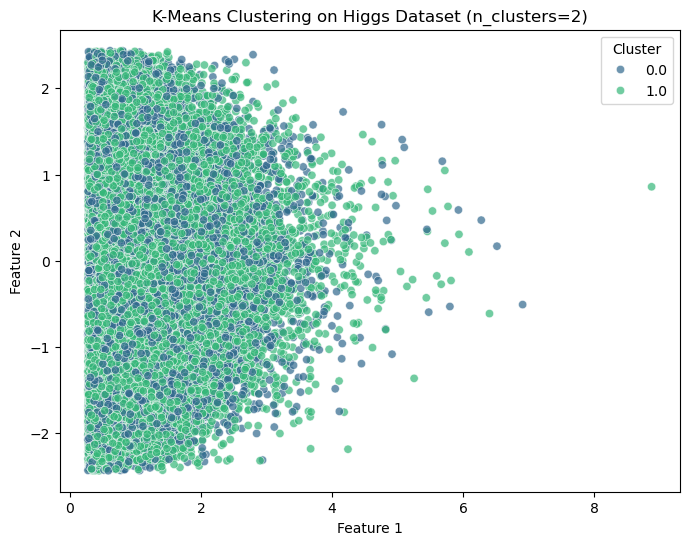

CPU times: user 21 s, sys: 3.63 s, total: 24.6 s
Wall time: 35.6 s


In [ ]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.cluster import KMeans  # GPU-accelerated K-Means

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the Higgs datasets
higgs_train = cudf.read_csv("higgs_train.csv")
higgs_test  = cudf.read_csv("higgs_test.csv")

# Combine train and test sets
higgs_data = cudf.concat([higgs_train, higgs_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = higgs_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Apply K-Means Clustering
# ---------------------------
n_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)  # Using `features`, NOT `X`

# n_clusters int (default = 8)
# max_iter int (default = 300)
# tol float64 (default = 1e-4)

# ---------------------------
# 3. Add Cluster Labels
# ---------------------------
sample_data["Cluster"] = cluster_labels  # Assign clusters to `sample_data`

# ---------------------------
# 4. Visualize Clusters (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0].to_pandas(),  # First feature
                y=features.iloc[:, 1].to_pandas(),  # Second feature
                hue=cluster_labels.to_pandas(),
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-Means Clustering on Higgs Dataset (n_clusters={n_clusters})")
plt.legend(title="Cluster")
plt.show()


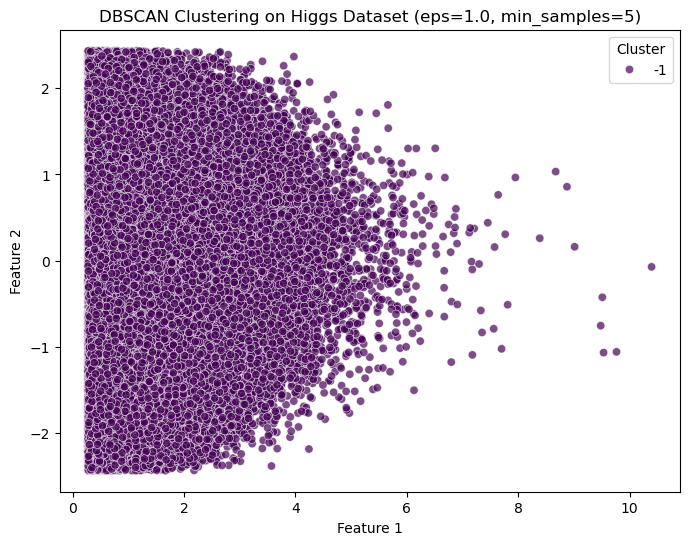

CPU times: user 3min 5s, sys: 19.3 s, total: 3min 24s
Wall time: 3min 5s


In [2]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.cluster import DBSCAN  # GPU-accelerated DBSCAN

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the Higgs datasets
higgs_train = cudf.read_csv("higgs_train.csv")
higgs_test  = cudf.read_csv("higgs_test.csv")

# Combine train and test sets
higgs_data = cudf.concat([higgs_train, higgs_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = higgs_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Apply DBSCAN Clustering
# ---------------------------
eps = 1.0  # Maximum distance between two samples to be considered neighbors
min_samples = 5  # Minimum number of points to form a dense region

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(features)  # Predict cluster labels

# ---------------------------
# 3. Add Cluster Labels
# ---------------------------
sample_data["Cluster"] = cluster_labels  # Assign clusters to `sample_data`

# ---------------------------
# 4. Visualize Clusters (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features.iloc[:, 0].to_pandas(),  # First feature
                y=features.iloc[:, 1].to_pandas(),  # Second feature
                hue=cluster_labels.to_pandas(),
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering on Higgs Dataset (eps={eps}, min_samples={min_samples})")
plt.legend(title="Cluster")
plt.show()


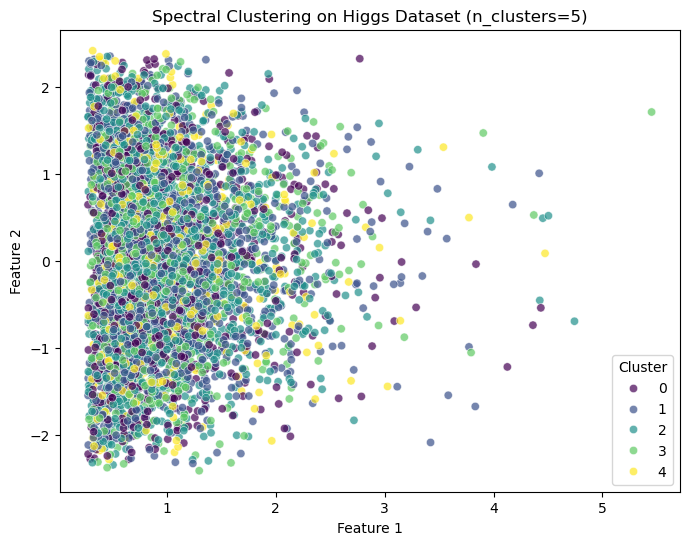

CPU times: user 25.6 s, sys: 2.44 s, total: 28.1 s
Wall time: 27.8 s


In [1]:
%%time
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering  # Using scikit-learn for spectral clustering

# ---------------------------
# 1. Load and Prepare Data
# ---------------------------
# Read in the Higgs datasets
higgs_train = cudf.read_csv("higgs_train.csv")
higgs_test  = cudf.read_csv("higgs_test.csv")

# Combine train and test sets
higgs_data = cudf.concat([higgs_train, higgs_test], ignore_index=True)

# Sample 1,000,000 rows from the combined dataset
sample_data = higgs_data.sample(n=1000000, random_state=42)

# Prepare features: assume all columns except "class_label" are features
features = sample_data.drop(columns=['class_label']).astype('float32')

# ---------------------------
# 2. Subsample for Spectral Clustering
# ---------------------------
# Due to the computational demands of spectral clustering, select a smaller subset (e.g., 5,000 rows)
spectral_sample = features.iloc[:5000]
# Convert to a NumPy array (SpectralClustering requires a CPU array)
spectral_sample_np = spectral_sample.to_pandas().values

# ---------------------------
# 3. Apply Spectral Clustering
# ---------------------------
n_clusters = 5  # Set the number of clusters (adjust as needed)
spectral = SpectralClustering(n_clusters=n_clusters,
                              affinity="nearest_neighbors",
                              assign_labels="discretize",
                              random_state=42)
spectral_labels = spectral.fit_predict(spectral_sample_np)

# ---------------------------
# 4. Visualize Spectral Clustering Results (Using First Two Features)
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spectral_sample.iloc[:, 0].to_pandas(),  # First feature
                y=spectral_sample.iloc[:, 1].to_pandas(),  # Second feature
                hue=spectral_labels,
                palette="viridis", alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Spectral Clustering on Higgs Dataset (n_clusters={n_clusters})")
plt.legend(title="Cluster")
plt.show()
